# Handwritten Digit Recognition
- Author = Amitrajit Bose
- Dataset = MNIST
- [Medium Article Link](https://medium.com/@amitrajit_bose/handwritten-digit-mnist-pytorch-977b5338e627)
- Frameworks = PyTorch

Torch Requirements:
Mac

`brew install readline xz`

Ubuntu

`sudo apt-get install liblzma-dev`

Centos

`yum install -y xz-devel`

### Necessary Imports

In [6]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import matplotlib.pyplot as plt
from time import time
import os

### Download The Dataset & Define The Transforms

In [7]:
### Run this cell

from typing import Any
#from torchvision import datasets
from torchvision.datasets import MNIST
from torchvision.transforms import v2, Lambda
from torch.utils.data import Subset

# Define a transform to normalize the data
transform = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize((0.5,), (0.5,)),
])

# Download and load the training data
trainset = MNIST('data/mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = MNIST('data/mnist/MNIST_data/', download=True, train=False, transform=transform)


In [8]:
# 尋找雙數label/targets的 index
train_even_indices = [i for i, t in enumerate(trainset.targets) if t % 2 == 0]
val_even_indices = [i for i, t in enumerate(valset.targets) if t % 2 == 0]
print(len(train_even_indices)) # 查看只有多少訓練數據

29492


In [9]:
trainloader = torch.utils.data.DataLoader(Subset(trainset, train_even_indices), batch_size=64, shuffle=True, drop_last=True)
valloader = torch.utils.data.DataLoader(Subset(valset, val_even_indices), batch_size=64, shuffle=True, drop_last=True)

### Exploring The Data

In [10]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


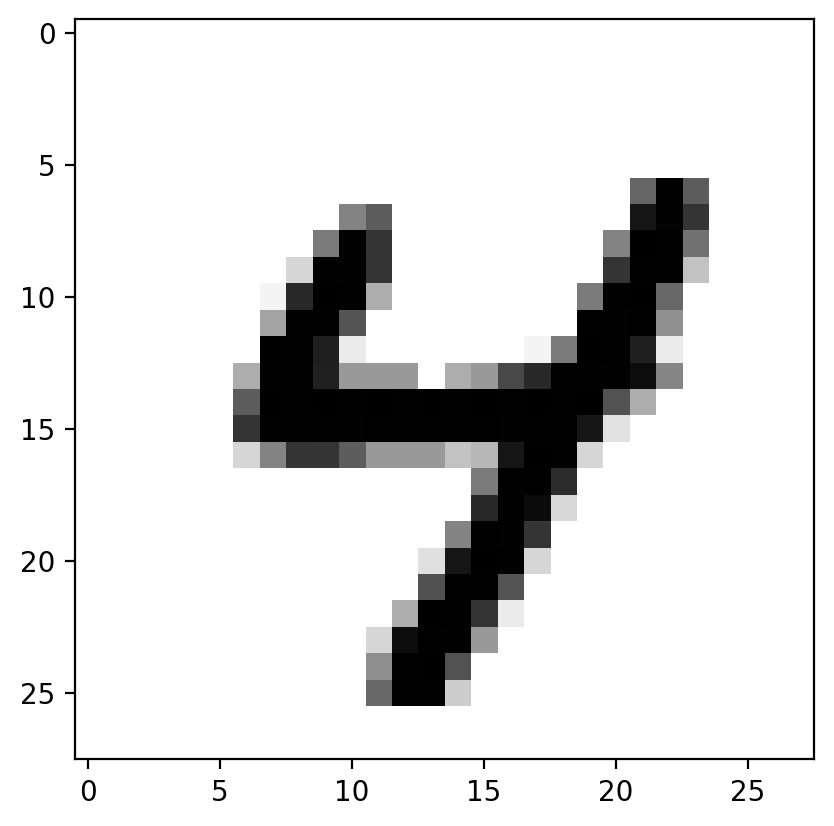

In [11]:
plt.imshow(images[3].numpy().squeeze(), cmap='gray_r');

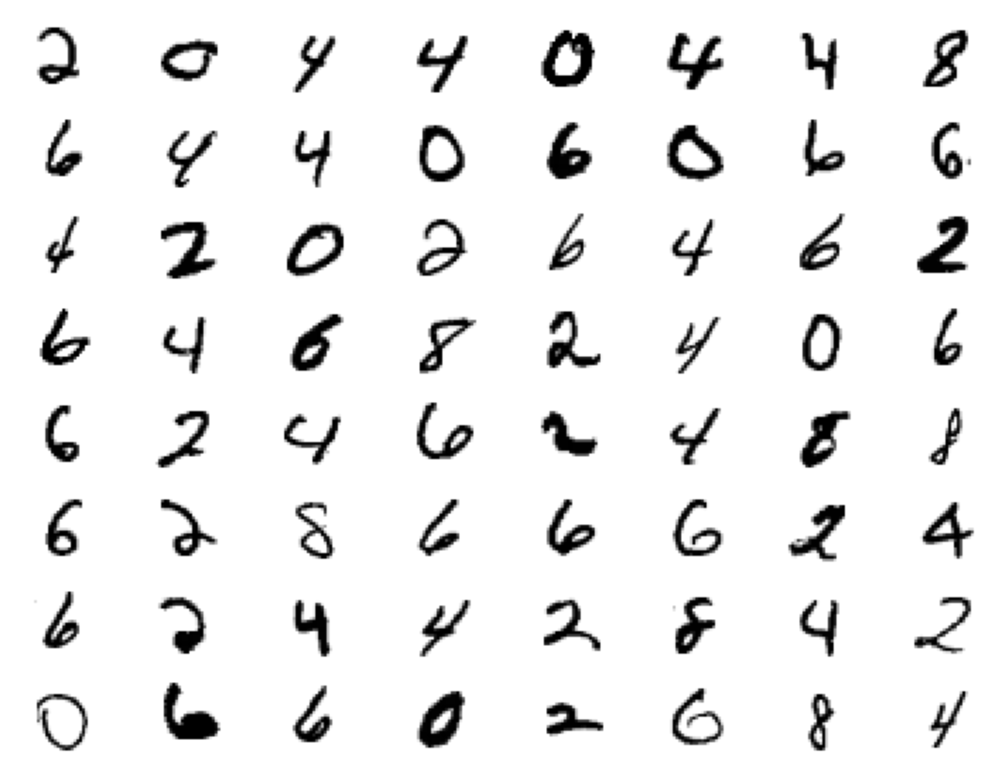

In [12]:
figure = plt.figure()
num_of_images = 64
for index in range(0, num_of_images):
    plt.subplot(8, 8, index+1)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

### Defining The Neural Network

![](https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/image/mlp_mnist.png)

In [13]:
from torch import nn

# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 5

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=5, bias=True)
  (5): LogSoftmax(dim=1)
)


In [14]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels // 2)

In [15]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0063, -0.0063, -0.0063,  ..., -0.0063, -0.0063, -0.0063],
        [-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009],
        [ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007],
        ...,
        [-0.0043, -0.0043, -0.0043,  ..., -0.0043, -0.0043, -0.0043],
        [-0.0047, -0.0047, -0.0047,  ..., -0.0047, -0.0047, -0.0047],
        [ 0.0017,  0.0017,  0.0017,  ...,  0.0017,  0.0017,  0.0017]])


In [16]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [17]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels//2)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0289,  0.0248,  0.0150,  ...,  0.0179, -0.0242,  0.0257],
        [ 0.0185, -0.0240,  0.0081,  ..., -0.0013, -0.0293, -0.0097],
        [ 0.0138, -0.0071,  0.0044,  ...,  0.0107, -0.0115,  0.0178],
        ...,
        [ 0.0069, -0.0048, -0.0027,  ...,  0.0006, -0.0113, -0.0294],
        [ 0.0314, -0.0173,  0.0014,  ...,  0.0073,  0.0175, -0.0246],
        [ 0.0241, -0.0009,  0.0279,  ...,  0.0297,  0.0232,  0.0184]],
       requires_grad=True)
Gradient - tensor([[-0.0033, -0.0033, -0.0033,  ..., -0.0033, -0.0033, -0.0033],
        [-0.0030, -0.0030, -0.0030,  ..., -0.0030, -0.0030, -0.0030],
        [-0.0011, -0.0011, -0.0011,  ..., -0.0011, -0.0011, -0.0011],
        ...,
        [-0.0046, -0.0046, -0.0046,  ..., -0.0046, -0.0046, -0.0046],
        [-0.0058, -0.0058, -0.0058,  ..., -0.0058, -0.0058, -0.0058],
        [-0.0019, -0.0019, -0.0019,  ..., -0.0019, -0.0019, -0.0019]])


In [18]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0289,  0.0248,  0.0151,  ...,  0.0179, -0.0242,  0.0258],
        [ 0.0185, -0.0240,  0.0081,  ..., -0.0013, -0.0292, -0.0097],
        [ 0.0139, -0.0071,  0.0044,  ...,  0.0107, -0.0115,  0.0178],
        ...,
        [ 0.0069, -0.0048, -0.0027,  ...,  0.0006, -0.0113, -0.0293],
        [ 0.0315, -0.0172,  0.0014,  ...,  0.0074,  0.0175, -0.0245],
        [ 0.0242, -0.0009,  0.0279,  ...,  0.0297,  0.0232,  0.0185]],
       requires_grad=True)


### Core Training Of Neural Network

In [19]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels//2)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)


Epoch 0 - Training loss: 0.4067271066829562
Epoch 1 - Training loss: 0.1441137438882952
Epoch 2 - Training loss: 0.12259676303795498
Epoch 3 - Training loss: 0.10609410525218624
Epoch 4 - Training loss: 0.09137105123018441
Epoch 5 - Training loss: 0.07943833064814301
Epoch 6 - Training loss: 0.0691902165554221
Epoch 7 - Training loss: 0.06235874982085079
Epoch 8 - Training loss: 0.054814515098848424
Epoch 9 - Training loss: 0.04964201053321038
Epoch 10 - Training loss: 0.04429192868688994
Epoch 11 - Training loss: 0.041352797936870835
Epoch 12 - Training loss: 0.03725380983340311
Epoch 13 - Training loss: 0.03379853859989215
Epoch 14 - Training loss: 0.030360415411363962

Training Time (in minutes) = 0.5803217808405559


In [20]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(5), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(5))
    ax2.set_yticklabels(np.arange(5)*2)
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 8


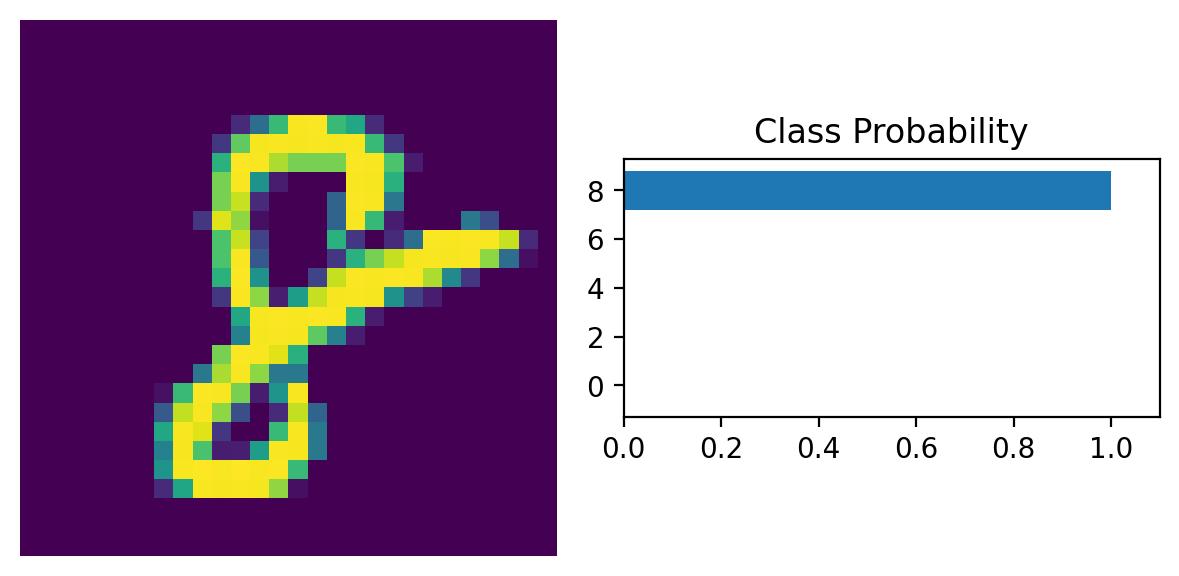

In [29]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab))*2)
view_classify(img.view(1, 28, 28), ps)

### Model Evaluation

In [22]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]//2
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 4864

Model Accuracy = 0.9839638157894737
